In [1]:
# importing the OpenCV module
import cv2 as cv

import sys
import os

# importing numpy to work with pixels
import numpy as np

# importing matplotlib to work with plots and display
import matplotlib.pyplot as plt
%matplotlib inline

# There is a difference between OpenCV addition and Numpy addition. OpenCV addition is a saturated operation while Numpy addition is a modulo operation.

In [3]:
#  Creating 8-bit array of one element 200
x = np.uint8([200])
#  Creating 8-bit array of one element 100
y = np.uint8([100])
# Adding our arrays
result = x + y     #200+100=300    => 300%256=44         
print("x:'{}' + y:'{}' = '{}'".format(x, y, result))

a = np.uint8([50])
b = np.uint8([100])
res = a - b
print("x:'{}' - y:'{}' = '{}'".format(x, y, res))

print("wrap around :", str(np.uint8([200]) + np.uint8([100])))
print("wrap around :", str(np.uint8([50]) - np.uint8([100])))


x:'[200]' + y:'[100]' = '[44]'
x:'[200]' - y:'[100]' = '[206]'
wrap around : [44]
wrap around : [206]


In [4]:
result = cv.add(x,y)
print("x:'{}' + y:'{}' = '{}'".format(x, y, result))
res = cv.subtract(x,y)
print("x:'{}' - y:'{}' = '{}'".format(x, y, res))

x:'[200]' + y:'[100]' = '[[255]]'
x:'[200]' - y:'[100]' = '[[100]]'


In [5]:
# printing out details of image min, max and the wrap around
print("max of 255 :", str(cv.add(np.uint8([200]), np.uint8([100]))))
print("min of 0 :", str(cv.subtract(np.uint8([50]), np.uint8([100]))))

max of 255 : [[255]]
min of 0 : [[0]]


# Adding Two Images Using add function( images should be of same size)

In [6]:
# Read Image1
img1 = cv.imread("input1.jpg",1)
#  Read Image2
img2 = cv.imread("input2.jpg",1)
#Add the images
img = cv.add(img1,img2)

# Show the image
cv.imshow('image', img)
  
# Wait for a key
cv.waitKey(0)
  
# Destroy all the window open
cv.destroyAllWindows()

# Subtract Two Images Using add function( images should be of same size)

In [11]:
# Read Image1
img1 = cv.imread("input1.jpg",1)
#  Read Image2
img2 = cv.imread("input2.jpg",1)
#Add the images
img = cv.subtract(img1,img2)

# Show the image
cv.imshow('image', img)
  
# Wait for a key
cv.waitKey(0)
  
# Destroy all the window open
cv.destroyAllWindows()

# Image Saturation

## Adding pixels of value 255 (white)- (whole image changed to white so value used is 100) to the image


In [4]:
# Read Image1
img1 = cv.imread("input1.jpg",1)

# adding pixels of value 100 (gray) to the image  
# As the resulting images are closer to 255 the resulting images appear brighter
M = np.ones(img1.shape, dtype="uint8") * 100
cv.imshow("mask", M)
key= cv.waitKey(0)

added = cv.add(img1, M)

cv.imshow("Original Image", img1)
key= cv.waitKey(0)

cv.imshow("Added", added)
key= cv.waitKey(0)

# Destroy all the window open
cv.destroyAllWindows()

## Dummy array of value 50 is substracted from image

In [13]:
img2 = cv.imread("input2.jpg",1)

# adding pixels of value 50 (black) to the image
# The pixel values will decrease and our original 
# image will become darker. If the result of subtracted pixel values is 0, 
# our pixels will become black.

N = np.ones(img2.shape, dtype="uint8") * 50
cv.imshow("mask", N)
key= cv.waitKey(0)

#print(N)
subtracted = cv.subtract(img2, N)

cv.imshow("Original Image", img2)
key= cv.waitKey(0)

cv.imshow("Subtracted", subtracted)
cv.waitKey(0)

key= cv.waitKey(0)

# Destroy all the window open
cv.destroyAllWindows()

#  Add Images using Operator and matrix expression

In [14]:
# Read Image1
img1 = cv.imread("input1.jpg",1)
#  Read Image2
img2 = cv.imread("input2.jpg",1)
#Add the images
img = img1+img2

cv.imshow("Original Image1", img1)
key=cv.waitKey(0)

cv.imshow("Original Image2", img2)
key=cv.waitKey(0)

# Show the image
cv.imshow('image', img)
  
# Wait for a key
cv.waitKey(0)
  
# Destroy all the window open
cv.destroyAllWindows()

# By Splitting channels and then performing addition

In [16]:
# Read Image1
img1 = cv.imread("input1.jpg")
#  Read Image2
img2 = cv.imread("input2.jpg")

# Make float and divide by 255 to give BGRdash
bgrdash1 = img1.astype(np.float)/255.
bgrdash2 = img2.astype(np.float)/255.

#print(bgrdash.shape)

#splitting channels of first image
B1 = bgrdash1[...,2]
G1 = bgrdash1[...,1]
R1 = bgrdash1[...,0]

#splitting channels of second image
B2 = bgrdash1[...,2]
G2 = bgrdash1[...,1]
R2 = bgrdash1[...,0]

#Add the images
img = (np.dstack(((B1+B2),(G1+G2),(R1+R2))) * 255).astype(np.uint8)

# Show the image
cv.imshow('image', img)
  
# Wait for a key
cv.waitKey(0)
  
# Destroy all the window open
cv.destroyAllWindows()

C:\Users\SHRLAL\AppData\Local\Temp\ipykernel_21884\403347044.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bgrdash1 = img1.astype(np.float)/255.
C:\Users\SHRLAL\AppData\Local\Temp\ipykernel_21884\403347044.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bgrdash2 = img2.astype(np.float)/255.


# Substract Images using Operator

In [8]:
# Read Image1
img1 = cv.imread("input1.jpg",1)
#  Read Image2
img2 = cv.imread("input2.jpg",1)
#Add the images
img = img1 - img2

cv.imshow("Original Image1", img1)
key=cv.waitKey(0)

cv.imshow("Original Image2", img2)
key=cv.waitKey(0)

# Show the image
cv.imshow('image', img)
  
# Wait for a key
cv.waitKey(0)
  
# Destroy all the window open
cv.destroyAllWindows()

# Image Blending
## Using addWeighted Function
### Syntax:    cv.addWeighted(	src1, alpha, src2, beta, gamma[, dst[, dtype]]	) ->	dst
#### dtype: optional depth of the output array; when both input arrays have the same depth, dtype can be set to -1, which will be equivalent to src1.depth().

In [17]:
# Read Image1
img1 = cv.imread("input1.jpg", 1)

#  Read Image2
img2 = cv.imread("input2.jpg", 1)
  
# Blending the images with 0.3 and 0.7
img = cv.addWeighted(img1, 0.4, img2, 0.5, 0)

cv.imshow("Original Image1", img1)
key=cv.waitKey(0)

cv.imshow("Original Image2", img2)
key=cv.waitKey(0)

# Show the image
cv.imshow('Blended Image', img)
  
# Wait for a key
cv.waitKey(0)
  
# De-allocate any associated memory usage
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()


# Implementation of addWeighted

In [20]:
# Read Image1
img1 = cv.imread("input1.jpg", 1)

#  Read Image2
img2 = cv.imread("input2.jpg", 1)
  
# Blending the images with 0.4 and 0.5
alpha = 0.4
beta =  0.5                                # (1- alpha)
gamma = 0.0

dst = np.uint8(alpha*(img1)+beta*(img2)+gamma)

cv.imshow("Original Image1", img1)
key=cv.waitKey(0)

cv.imshow("Original Image2", img2)
key=cv.waitKey(0)

# Show the image
cv.imshow('Blended Image', dst)
  
# Wait for a key
cv.waitKey(0)
  
# De-allocate any associated memory usage
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()


## Image blending implementation (another example)

In [18]:
# Read Image1
img1 = cv.imread("WinL.jpg", 1)

#  Read Image2
img2 = cv.imread("LinL.jpg", 1)

alpha = 0.6
beta =  0.4                                # (1- alpha)
gamma = 0.0

dst = np.uint8(alpha*(img1)+beta*(img2)+gamma)

cv.imshow("Original Image1", img1)
key=cv.waitKey(0)

cv.imshow("Original Image2", img2)
key=cv.waitKey(0)

# Show the image
cv.imshow('Blended Image', dst)
  
# Wait for a key
cv.waitKey(0)
  
# De-allocate any associated memory usage
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

# Scale Add using opencv inbuilt function

## Python Syntax:     cv.scaleAdd(	src1, alpha, src2[, dst]	) ->	dst


In [17]:
# Read Image1
img1 = cv.imread("WinL.jpg", 1)

#  Read Image2
img2 = cv.imread("LinL.jpg", 1)
  
# scaling the images with scaling factor 0.2
img = cv.scaleAdd(img1, 5, img2)

cv.imshow("Original Image1", img1)
key=cv.waitKey(0)

cv.imshow("Original Image2", img2)
key=cv.waitKey(0)

# Show the image
cv.imshow('Scaled Image', img)
  
# Wait for a key
cv.waitKey(0)
  
# De-allocate any associated memory usage
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()


In [19]:
# Read Image1
img1 = cv.imread("WinL.jpg", 1)

#  Read Image2
img2 = cv.imread("LinL.jpg", 1)

scale = 5

dst = np.uint8((scale*img1)+img2)

cv.imshow("Original Image1", img1)
key=cv.waitKey(0)

cv.imshow("Original Image2", img2)
key=cv.waitKey(0)

# Show the image
cv.imshow('Scaled Image', dst)
  
# Wait for a key
cv.waitKey(0)
  
# De-allocate any associated memory usage
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

# Image Multiplication Using openCV (same result coming from scratch too)

In [68]:
import cv2

img = cv2.imread("WinL.jpg")
#img1 = cv2.imread("LinL.jpg")

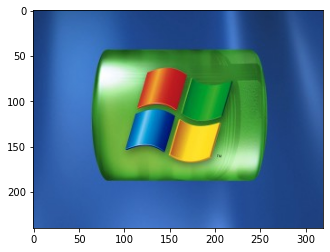

In [69]:
# Display image
plt.imshow(img[:,:,::-1])
plt.show()

# Multiply concepts

link : https://forum.opencv.org/t/confusion-in-cv2-multiply-function/9244/4

In [79]:
a = np.array([[[1,2,3]]],np.uint8)
print(a)

b = a*1.5
#array([[[1.5, 3. , 4.5]]])  #dtype=np.float64 !!
print(b)
print(b.dtype)

c = b.astype('uint8')
#array([[[1, 3, 4]]], dtype=uint8)  # surprise !
print(c)

d = cv2.multiply(a, (1,1,1,1), scale=1.5)
#array([[[2, 3, 4]]], dtype=uint8)
print(d)

# be *extremely* careful !!
b1 = a*150 #integer mul -> overflow -> modulo, indeed !
#array([[[150,  44, 194]]], dtype=uint8)  
print(b1)

b2 = a*150.0 # double mul -> overflow, no modulo here
#array([[[150., 300., 450.]]])
print(b2)

c1 = b2.astype('uint8') # but here !
#array([[[150,  44, 194]]], dtype=uint8)
print(c1)


[[[1 2 3]]]
[[[1.5 3.  4.5]]]
float64
[[[1 3 4]]]
[[[2 3 4]]]
[[[150  44 194]]]
[[[150. 300. 450.]]]
[[[150  44 194]]]


In [8]:
# Numpy code
npImg = img*2 # Modulo operator so not a good idea

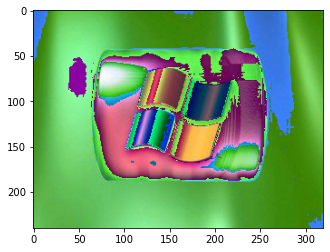

In [9]:
plt.imshow(npImg[:,:,::-1])
plt.show()

In [10]:
img.shape

(240, 320, 3)

In [14]:
nparr = np.ones((240, 320, 3),dtype=np.uint8) * 2 # mask with same image size with values all 2
print(nparr)

[[[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 ...

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]]


In [82]:
cvImg1 = cv2.multiply(img,nparr) # multiplication of two images
#cvImg1 = img * nparr

In [89]:
print(cvImg1)

[[[222 114  54]
  [224 116  56]
  [224 116  56]
  ...
  [255 126  64]
  [254 124  62]
  [254 124  62]]

 [[222 114  54]
  [224 116  56]
  [224 116  56]
  ...
  [255 126  64]
  [254 124  62]
  [254 124  62]]

 [[224 116  56]
  [224 116  56]
  [224 116  56]
  ...
  [255 126  64]
  [255 126  64]
  [255 126  64]]

 ...

 [[255 196 104]
  [255 196 104]
  [255 196 104]
  ...
  [250 128  60]
  [250 128  60]
  [250 128  60]]

 [[255 196 104]
  [255 196 104]
  [255 196 104]
  ...
  [252 130  62]
  [252 130  62]
  [252 130  62]]

 [[255 196 104]
  [255 196 104]
  [255 198 106]
  ...
  [252 130  62]
  [252 130  62]
  [252 130  62]]]


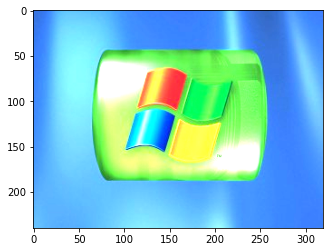

In [83]:
plt.imshow(cvImg1[:,:,::-1])
plt.show()

In [70]:
#cvImg = cv2.multiply(img,2) # multiplication to only B channel
cvImg = cv2.multiply(img, (2,2,2,2)) # multiplication for all channel and alpha channel too

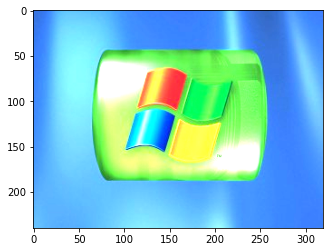

In [71]:
plt.imshow(cvImg[:,:,::-1])
plt.show()

# Image Multiplication Scratch Implementation


In [94]:
# Applying NumPy scalar multiplication on image
 
fimg2 = (img * 2.0)

# Saving the output image
cv2.imwrite('output.jpg', fimg2)


True

In [92]:
print(fimg2)

[[[222. 114.  54.]
  [224. 116.  56.]
  [224. 116.  56.]
  ...
  [256. 126.  64.]
  [254. 124.  62.]
  [254. 124.  62.]]

 [[222. 114.  54.]
  [224. 116.  56.]
  [224. 116.  56.]
  ...
  [256. 126.  64.]
  [254. 124.  62.]
  [254. 124.  62.]]

 [[224. 116.  56.]
  [224. 116.  56.]
  [224. 116.  56.]
  ...
  [256. 126.  64.]
  [256. 126.  64.]
  [256. 126.  64.]]

 ...

 [[346. 196. 104.]
  [346. 196. 104.]
  [346. 196. 104.]
  ...
  [250. 128.  60.]
  [250. 128.  60.]
  [250. 128.  60.]]

 [[346. 196. 104.]
  [346. 196. 104.]
  [346. 196. 104.]
  ...
  [252. 130.  62.]
  [252. 130.  62.]
  [252. 130.  62.]]

 [[346. 196. 104.]
  [346. 196. 104.]
  [348. 198. 106.]
  ...
  [252. 130.  62.]
  [252. 130.  62.]
  [252. 130.  62.]]]


# Just checking

In [25]:
import cv2

falcon = cv2.multiply(img, nparr)

back = cv2.multiply(img1, (255 - nparr))

#result = cv2.add(falcon, back)
#result = (falcon/255.)*(back/255)*255

result = cv2.bitwise_and(falcon, back)

cv2.imshow("Image",result)
cv2.waitKey(0)

# De-allocate any associated memory usage
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()


In [41]:
 
# Applying OpenCV scalar multiplication on image
fimg1 = cv2.multiply(img, 1.5)
 
# Showing the output image
cv2.imshow('output image', fimg1)
cv2.waitKey(0)

# De-allocate any associated memory usage
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()


In [54]:
img11 = cv2.imread("bird.jpg")
x = (img11 * 2)
print(x)

# Showing the output image
cv2.imshow('output image', x)
cv2.waitKey(0)

# De-allocate any associated memory usage
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()


[[[100 146 178]
  [ 76 120 130]
  [ 18  60  30]
  ...
  [254 254 242]
  [254 250 254]
  [216 218 226]]

 [[ 84 102 122]
  [ 86 106 106]
  [194 220 176]
  ...
  [232 222 204]
  [242 234 246]
  [236 238 246]]

 [[140 100  98]
  [254 242 218]
  [208 204 142]
  ...
  [200 190 172]
  [232 220 230]
  [250 252 254]]

 ...

 [[250 242 254]
  [232 228 252]
  [152 154 162]
  ...
  [154 162 172]
  [208 210 250]
  [244 244 254]]

 [[254 254 226]
  [220 234 192]
  [192 202 160]
  ...
  [228 236 254]
  [218 214 254]
  [230 224 254]]

 [[254 254 200]
  [228 250 174]
  [252 254 200]
  ...
  [228 234 254]
  [202 202 254]
  [244 236 254]]]


# Image Division Using openCV (same result from scratch implementation too)

* Image division operation can be used for change detection like a subtraction but instead of giving the absolute change for each pixel value from one image to another, division operation gives the fractional change or ratio between corresponding pixel values.That’s why it is commonly known as **rationing**.



In [85]:
# Reading image file
img21 = cv2.imread('bird.jpg')
 
# Applying OpenCV scalar division on image
for i in range(3):
    fimg = cv2.divide(img21, (2,2,2,2))  # decrease brightness
    
#Saving the output image
cv2.imwrite('output1.jpg', fimg)


True

In [88]:
print(fimg)

[[[ 89.  100.5 108.5]
  [ 19.   30.   32.5]
  [ 68.5  79.   71.5]
  ...
  [127.5 127.5 124.5]
  [127.5 126.5 127.5]
  [118.  118.5 120.5]]

 [[ 85.   89.5  94.5]
  [ 85.5  90.5  90.5]
  [112.5 119.  108. ]
  ...
  [122.  119.5 115. ]
  [124.5 122.5 125.5]
  [123.  123.5 125.5]]

 [[ 99.   89.   88.5]
  [127.5 124.5 118.5]
  [116.  115.   99.5]
  ...
  [114.  111.5 107. ]
  [122.  119.  121.5]
  [126.5 127.  127.5]]

 ...

 [[126.5 124.5 127.5]
  [122.  121.  127. ]
  [102.  102.5 104.5]
  ...
  [102.5 104.5 107. ]
  [116.  116.5 126.5]
  [125.  125.  127.5]]

 [[127.5 127.5 120.5]
  [119.  122.5 112. ]
  [112.  114.5 104. ]
  ...
  [121.  123.  127.5]
  [118.5 117.5 127.5]
  [121.5 120.  127.5]]

 [[127.5 127.5 114. ]
  [121.  126.5 107.5]
  [127.  127.5 114. ]
  ...
  [121.  122.5 127.5]
  [114.5 114.5 127.5]
  [125.  123.  127.5]]]


# Image Division Scratch Implementation

In [86]:
# Reading image file
img22 = cv2.imread('bird.jpg')
 
# Applying NumPy scalar division on image
fimg = img22 / 2
 
# Saving the output image
cv2.imwrite('output2.jpg', fimg)


True

In [87]:
print(fimg)

[[[ 89.  100.5 108.5]
  [ 19.   30.   32.5]
  [ 68.5  79.   71.5]
  ...
  [127.5 127.5 124.5]
  [127.5 126.5 127.5]
  [118.  118.5 120.5]]

 [[ 85.   89.5  94.5]
  [ 85.5  90.5  90.5]
  [112.5 119.  108. ]
  ...
  [122.  119.5 115. ]
  [124.5 122.5 125.5]
  [123.  123.5 125.5]]

 [[ 99.   89.   88.5]
  [127.5 124.5 118.5]
  [116.  115.   99.5]
  ...
  [114.  111.5 107. ]
  [122.  119.  121.5]
  [126.5 127.  127.5]]

 ...

 [[126.5 124.5 127.5]
  [122.  121.  127. ]
  [102.  102.5 104.5]
  ...
  [102.5 104.5 107. ]
  [116.  116.5 126.5]
  [125.  125.  127.5]]

 [[127.5 127.5 120.5]
  [119.  122.5 112. ]
  [112.  114.5 104. ]
  ...
  [121.  123.  127.5]
  [118.5 117.5 127.5]
  [121.5 120.  127.5]]

 [[127.5 127.5 114. ]
  [121.  126.5 107.5]
  [127.  127.5 114. ]
  ...
  [121.  122.5 127.5]
  [114.5 114.5 127.5]
  [125.  123.  127.5]]]
